In [31]:
import torch
import torchvision
import torch.nn as nn
import torch.nn.functional as F
import torchvision.transforms as transforms
import time
from tqdm import tqdm_notebook as tqdm
import matplotlib.pyplot as plt
import numpy as np

In [32]:
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
device

device(type='cuda')

In [33]:
# Prepare dataset
transform = transforms.Compose([transforms.ToTensor(),transforms.Normalize(mean=0.1307,std=0.3081)])

train_set = torchvision.datasets.MNIST(root = "./dataset",train=True,download=False,transform=transform)  #Make download == True to download dataset
test_set = torchvision.datasets.MNIST(root ="./dataset",train=False,download=False,transform=transform)

train_loader = torch.utils.data.DataLoader(train_set,batch_size=32,shuffle=True,num_workers=4)
test_loader = torch.utils.data.DataLoader(test_set,batch_size=32,shuffle=True,num_workers=4)

In [34]:
data__ = enumerate(train_loader)
batch_id , (images,labels) = next(data__)

In [35]:
images.shape

torch.Size([32, 1, 28, 28])

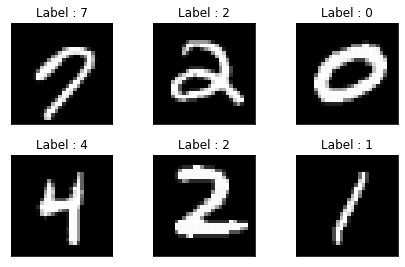

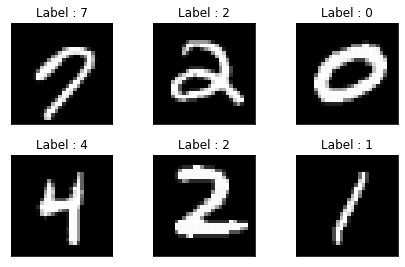

In [36]:
fig = plt.figure()
for i in range(6):
  plt.subplot(2,3,i+1)
  plt.tight_layout()
  plt.imshow(images[i][0], cmap='gray', interpolation='none')
  plt.title("Label : {}".format(labels[i]))
  plt.xticks([])
  plt.yticks([])
fig

In [37]:
# Building neural net
class Net(nn.Module):
    def __init__(self,num_classes=10):
        super(Net,self).__init__()

        # Instantiate two convolutional layers
        self.conv1 = nn.Conv2d(in_channels=1, out_channels=5, kernel_size=3, padding=1)
        self.conv2 = nn.Conv2d(in_channels=5, out_channels=10, kernel_size=3, padding=1)

        # Instantiate a max pooling layer
        self.pool = nn.MaxPool2d(2, 2)
        
        # Instantiate a fully connected layer
        self.fc1 = nn.Linear(7 * 7 * 10, 100)
        self.fc2 = nn.Linear(100,num_classes)
    
    def forward(self,x):
        # Apply conv followd by relu, then in next line pool
        x = F.relu(self.conv1(x))
        x = self.pool(x)

        # Apply conv followd by relu, then in next line pool
        x = F.relu(self.conv2(x))
        x = self.pool(x)

        # Prepare the image for the fully connected layer
        x = x.view(-1, 7*7*10)
        x = self.fc1(x)

        # Apply the fully connected layer and return the result
        return self.fc2(x)

# To calculate output size use formula (W - K + 2P/S) + 1
# image dimension is 28 * 28 * 1
# W = 28 , K = 3 , P = 1 , S = 1
# after con1 , output size is 28*28*5
# after first maxpool, output size is 14*14*5
# after conv2, output size is 14*14*10
# after second maxpool , output size is 7*7*10

# NOTE : For maxpool use same formula, just replace kernel with maxpool size

In [38]:
# Training nn

model = Net()
model.to(device) # transfer to GPU if available
optimizer = torch.optim.Adam(model.parameters(),lr=3e-4)
calculate_loss = nn.CrossEntropyLoss()

num_epochs = 200

since = time.time()

gradien_vector = []
for epoch in range(num_epochs):
    print('Epoch {}/{}'.format(epoch, num_epochs - 1))
    print('-' * 10)
    #scheduler.step()
    model.train()
    running_loss = 0.0
    tk0 = tqdm(train_loader, total=int(len(train_loader)))
    counter = 0



    # Training Code start 
    for batch_idx, data_set in enumerate(tk0):

        optimizer.zero_grad()  # Clear the old gradients from last step  
        data , labels = data_set
        data = data.to(device)
        labels = labels.to(device)
        output = model(data)   #forward
        output.to(device)
        loss = calculate_loss(output,labels) #calculate loss
        loss.backward()
        optimizer.step()

        # Training code ends



        running_loss += loss.item() * data.size(0)
        counter += 1
        tk0.set_postfix(loss=(running_loss / (counter * train_loader.batch_size)))
    
    #Gradients
    norm_gradient = 0
    for name, param in model.named_parameters():
        if param.requires_grad and "bias" not in name:
            #print (name, param.grad.data)
            norm_gradient += torch.norm(torch.flatten(param.grad.data))
    print(norm_gradient)
    gradien_vector.append(norm_gradient.item())

    
    # #weights
    # for name, param in model.named_parameters():
    #     if param.requires_grad:
    #         print (name, param.data)
    

time_elapsed = time.time() - since
print('\nTraining completed in {:.0f}m {:.0f}s'.format(time_elapsed // 60, time_elapsed % 60))
        


Epoch 0/199
----------


<ipython-input-38-1b5a6cd1cb4d>:19: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  tk0 = tqdm(train_loader, total=int(len(train_loader)))



tensor(1.6934, device='cuda:0')
Epoch 1/199
----------



tensor(0.4099, device='cuda:0')
Epoch 2/199
----------



tensor(4.2256, device='cuda:0')
Epoch 3/199
----------



tensor(3.0875, device='cuda:0')
Epoch 4/199
----------



tensor(0.3206, device='cuda:0')
Epoch 5/199
----------



tensor(1.6330, device='cuda:0')
Epoch 6/199
----------



tensor(6.0670, device='cuda:0')
Epoch 7/199
----------



tensor(2.6786, device='cuda:0')
Epoch 8/199
----------



tensor(0.1889, device='cuda:0')
Epoch 9/199
----------



tensor(4.1670, device='cuda:0')
Epoch 10/199
----------



tensor(0.0179, device='cuda:0')
Epoch 11/199
----------



tensor(0.7868, device='cuda:0')
Epoch 12/199
----------



tensor(0.4541, device='cuda:0')
Epoch 13/199
----------



tensor(3.0264, device='cuda:0')
Epoch 14/199
----------



tensor(3.2979, device='cuda:0')
Epoch 15/199
----------



tensor(0.3101, device='cuda:0')
Epoch 16/199
----------



tensor(3.3727, device='cuda:0')
Epoch 17/199
----------



tensor(0.5108, device='cuda:0')
Epoch 18/199
----------



tensor(0.1514, device='cuda:0')
Epoch 19/199
----------



tensor(0.5554, device='cuda:0')
Epoch 20/199
----------



tensor(0.0291, device='cuda:0')
Epoch 21/199
----------



tensor(0.7053, device='cuda:0')
Epoch 22/199
----------



tensor(0.0594, device='cuda:0')
Epoch 23/199
----------



tensor(0.0227, device='cuda:0')
Epoch 24/199
----------



tensor(0.0563, device='cuda:0')
Epoch 25/199
----------



tensor(2.1162, device='cuda:0')
Epoch 26/199
----------



tensor(0.0946, device='cuda:0')
Epoch 27/199
----------



tensor(2.8252, device='cuda:0')
Epoch 28/199
----------



tensor(8.5642, device='cuda:0')
Epoch 29/199
----------



tensor(0.0362, device='cuda:0')
Epoch 30/199
----------



tensor(0.1203, device='cuda:0')
Epoch 31/199
----------



tensor(0.8755, device='cuda:0')
Epoch 32/199
----------



tensor(0.0310, device='cuda:0')
Epoch 33/199
----------



tensor(6.5546, device='cuda:0')
Epoch 34/199
----------



tensor(0.0142, device='cuda:0')
Epoch 35/199
----------



tensor(0.0676, device='cuda:0')
Epoch 36/199
----------



tensor(2.4275, device='cuda:0')
Epoch 37/199
----------



tensor(0.4798, device='cuda:0')
Epoch 38/199
----------



tensor(0.3044, device='cuda:0')
Epoch 39/199
----------



tensor(0.0078, device='cuda:0')
Epoch 40/199
----------



tensor(1.4247, device='cuda:0')
Epoch 41/199
----------



tensor(0.1910, device='cuda:0')
Epoch 42/199
----------



tensor(0.1796, device='cuda:0')
Epoch 43/199
----------



tensor(0.0286, device='cuda:0')
Epoch 44/199
----------



tensor(0.0137, device='cuda:0')
Epoch 45/199
----------



tensor(0.0025, device='cuda:0')
Epoch 46/199
----------



tensor(0.0236, device='cuda:0')
Epoch 47/199
----------



tensor(8.2068, device='cuda:0')
Epoch 48/199
----------



tensor(0.2658, device='cuda:0')
Epoch 49/199
----------



tensor(6.8303, device='cuda:0')
Epoch 50/199
----------



tensor(0.0381, device='cuda:0')
Epoch 51/199
----------



tensor(0.0209, device='cuda:0')
Epoch 52/199
----------



tensor(0.0003, device='cuda:0')
Epoch 53/199
----------



tensor(0.3260, device='cuda:0')
Epoch 54/199
----------



tensor(2.0975, device='cuda:0')
Epoch 55/199
----------



tensor(0.0447, device='cuda:0')
Epoch 56/199
----------



tensor(0.0431, device='cuda:0')
Epoch 57/199
----------



tensor(0.7883, device='cuda:0')
Epoch 58/199
----------



tensor(0.0120, device='cuda:0')
Epoch 59/199
----------



tensor(0.0071, device='cuda:0')
Epoch 60/199
----------



tensor(0.0056, device='cuda:0')
Epoch 61/199
----------



tensor(0.4918, device='cuda:0')
Epoch 62/199
----------



tensor(0.0036, device='cuda:0')
Epoch 63/199
----------



tensor(3.9728, device='cuda:0')
Epoch 64/199
----------



tensor(0.2576, device='cuda:0')
Epoch 65/199
----------



tensor(8.6864, device='cuda:0')
Epoch 66/199
----------



tensor(3.1301, device='cuda:0')
Epoch 67/199
----------



tensor(0.0765, device='cuda:0')
Epoch 68/199
----------



tensor(1.4383, device='cuda:0')
Epoch 69/199
----------



tensor(0.0067, device='cuda:0')
Epoch 70/199
----------



tensor(7.9787, device='cuda:0')
Epoch 71/199
----------



tensor(0.0437, device='cuda:0')
Epoch 72/199
----------



tensor(2.0204e-05, device='cuda:0')
Epoch 73/199
----------



tensor(0.0263, device='cuda:0')
Epoch 74/199
----------



tensor(0.9870, device='cuda:0')
Epoch 75/199
----------



tensor(0.2096, device='cuda:0')
Epoch 76/199
----------



tensor(0.0572, device='cuda:0')
Epoch 77/199
----------



tensor(0.0050, device='cuda:0')
Epoch 78/199
----------



tensor(0.0145, device='cuda:0')
Epoch 79/199
----------



tensor(0.3328, device='cuda:0')
Epoch 80/199
----------



tensor(0.4826, device='cuda:0')
Epoch 81/199
----------



tensor(0.2404, device='cuda:0')
Epoch 82/199
----------



tensor(9.2502e-06, device='cuda:0')
Epoch 83/199
----------



tensor(3.8540, device='cuda:0')
Epoch 84/199
----------



tensor(0.2075, device='cuda:0')
Epoch 85/199
----------



tensor(0.0012, device='cuda:0')
Epoch 86/199
----------



tensor(0.0015, device='cuda:0')
Epoch 87/199
----------



tensor(0.0083, device='cuda:0')
Epoch 88/199
----------



tensor(0.2629, device='cuda:0')
Epoch 89/199
----------



tensor(0.9939, device='cuda:0')
Epoch 90/199
----------



tensor(0.2238, device='cuda:0')
Epoch 91/199
----------



tensor(0.6646, device='cuda:0')
Epoch 92/199
----------



tensor(0.0008, device='cuda:0')
Epoch 93/199
----------



tensor(0.4059, device='cuda:0')
Epoch 94/199
----------



tensor(0.0682, device='cuda:0')
Epoch 95/199
----------



tensor(0.0024, device='cuda:0')
Epoch 96/199
----------



tensor(0.0519, device='cuda:0')
Epoch 97/199
----------



tensor(0.0002, device='cuda:0')
Epoch 98/199
----------



tensor(4.3100, device='cuda:0')
Epoch 99/199
----------



tensor(3.7008, device='cuda:0')
Epoch 100/199
----------



tensor(5.1082, device='cuda:0')
Epoch 101/199
----------



tensor(0.0131, device='cuda:0')
Epoch 102/199
----------



tensor(0.1341, device='cuda:0')
Epoch 103/199
----------



tensor(0.0171, device='cuda:0')
Epoch 104/199
----------



tensor(0.0785, device='cuda:0')
Epoch 105/199
----------



tensor(0.0016, device='cuda:0')
Epoch 106/199
----------



tensor(0.1219, device='cuda:0')
Epoch 107/199
----------



tensor(4.5228, device='cuda:0')
Epoch 108/199
----------



tensor(0.0500, device='cuda:0')
Epoch 109/199
----------



tensor(0.0264, device='cuda:0')
Epoch 110/199
----------



tensor(0.1590, device='cuda:0')
Epoch 111/199
----------



tensor(0.0007, device='cuda:0')
Epoch 112/199
----------



tensor(0.0079, device='cuda:0')
Epoch 113/199
----------



tensor(1.5659e-05, device='cuda:0')
Epoch 114/199
----------



tensor(0.0097, device='cuda:0')
Epoch 115/199
----------



tensor(7.1640, device='cuda:0')
Epoch 116/199
----------



tensor(4.1037e-06, device='cuda:0')
Epoch 117/199
----------



tensor(0.0266, device='cuda:0')
Epoch 118/199
----------



tensor(0.0374, device='cuda:0')
Epoch 119/199
----------



tensor(0.0104, device='cuda:0')
Epoch 120/199
----------



tensor(0.0190, device='cuda:0')
Epoch 121/199
----------



tensor(0.0103, device='cuda:0')
Epoch 122/199
----------



tensor(0.0009, device='cuda:0')
Epoch 123/199
----------



tensor(0.0033, device='cuda:0')
Epoch 124/199
----------



tensor(13.2899, device='cuda:0')
Epoch 125/199
----------



tensor(1.3062e-07, device='cuda:0')
Epoch 126/199
----------



tensor(0.0199, device='cuda:0')
Epoch 127/199
----------



tensor(9.5482e-05, device='cuda:0')
Epoch 128/199
----------



tensor(0.0244, device='cuda:0')
Epoch 129/199
----------



tensor(0.0241, device='cuda:0')
Epoch 130/199
----------



tensor(7.1660, device='cuda:0')
Epoch 131/199
----------



tensor(0.0004, device='cuda:0')
Epoch 132/199
----------



tensor(2.2652, device='cuda:0')
Epoch 133/199
----------



tensor(0.2639, device='cuda:0')
Epoch 134/199
----------



tensor(0.0034, device='cuda:0')
Epoch 135/199
----------



tensor(0.0661, device='cuda:0')
Epoch 136/199
----------



tensor(0.5546, device='cuda:0')
Epoch 137/199
----------



tensor(5.4659e-06, device='cuda:0')
Epoch 138/199
----------



tensor(12.5149, device='cuda:0')
Epoch 139/199
----------



tensor(0.0003, device='cuda:0')
Epoch 140/199
----------



tensor(12.9660, device='cuda:0')
Epoch 141/199
----------



tensor(0.0187, device='cuda:0')
Epoch 142/199
----------



tensor(0.0457, device='cuda:0')
Epoch 143/199
----------



tensor(2.4304, device='cuda:0')
Epoch 144/199
----------



tensor(1.2266, device='cuda:0')
Epoch 145/199
----------



tensor(4.1718, device='cuda:0')
Epoch 146/199
----------



tensor(3.0828, device='cuda:0')
Epoch 147/199
----------



tensor(0.0753, device='cuda:0')
Epoch 148/199
----------



tensor(0.0030, device='cuda:0')
Epoch 149/199
----------



tensor(0.0317, device='cuda:0')
Epoch 150/199
----------



tensor(0.0124, device='cuda:0')
Epoch 151/199
----------



tensor(2.2974, device='cuda:0')
Epoch 152/199
----------



tensor(0.7011, device='cuda:0')
Epoch 153/199
----------



tensor(0.0051, device='cuda:0')
Epoch 154/199
----------



tensor(0.0004, device='cuda:0')
Epoch 155/199
----------



tensor(2.5285e-07, device='cuda:0')
Epoch 156/199
----------



tensor(0.0532, device='cuda:0')
Epoch 157/199
----------



tensor(2.1614, device='cuda:0')
Epoch 158/199
----------



tensor(0.0002, device='cuda:0')
Epoch 159/199
----------



tensor(12.3475, device='cuda:0')
Epoch 160/199
----------



tensor(0.0126, device='cuda:0')
Epoch 161/199
----------



tensor(5.3579e-05, device='cuda:0')
Epoch 162/199
----------



tensor(9.5239e-06, device='cuda:0')
Epoch 163/199
----------



tensor(0.0100, device='cuda:0')
Epoch 164/199
----------



tensor(2.7035, device='cuda:0')
Epoch 165/199
----------



tensor(0.0368, device='cuda:0')
Epoch 166/199
----------



tensor(1.1565, device='cuda:0')
Epoch 167/199
----------



tensor(0.0127, device='cuda:0')
Epoch 168/199
----------



tensor(0.1067, device='cuda:0')
Epoch 169/199
----------



tensor(21.4902, device='cuda:0')
Epoch 170/199
----------



tensor(0.0321, device='cuda:0')
Epoch 171/199
----------



tensor(0.0783, device='cuda:0')
Epoch 172/199
----------



tensor(0.0390, device='cuda:0')
Epoch 173/199
----------



tensor(0.1782, device='cuda:0')
Epoch 174/199
----------



tensor(0.0002, device='cuda:0')
Epoch 175/199
----------



tensor(0.0041, device='cuda:0')
Epoch 176/199
----------



tensor(0.0325, device='cuda:0')
Epoch 177/199
----------



tensor(0.0034, device='cuda:0')
Epoch 178/199
----------



tensor(0.0956, device='cuda:0')
Epoch 179/199
----------



tensor(0.0002, device='cuda:0')
Epoch 180/199
----------



tensor(0.0004, device='cuda:0')
Epoch 181/199
----------



tensor(0.0175, device='cuda:0')
Epoch 182/199
----------



tensor(0.0028, device='cuda:0')
Epoch 183/199
----------



tensor(0.0007, device='cuda:0')
Epoch 184/199
----------



tensor(0.0037, device='cuda:0')
Epoch 185/199
----------



tensor(0.0004, device='cuda:0')
Epoch 186/199
----------



tensor(0.0257, device='cuda:0')
Epoch 187/199
----------



tensor(0.1031, device='cuda:0')
Epoch 188/199
----------



tensor(0.0019, device='cuda:0')
Epoch 189/199
----------



tensor(0.3883, device='cuda:0')
Epoch 190/199
----------



tensor(3.5707e-09, device='cuda:0')
Epoch 191/199
----------



tensor(3.0602e-08, device='cuda:0')
Epoch 192/199
----------



tensor(0.0629, device='cuda:0')
Epoch 193/199
----------



tensor(3.2154, device='cuda:0')
Epoch 194/199
----------



tensor(0.0448, device='cuda:0')
Epoch 195/199
----------



tensor(0.0001, device='cuda:0')
Epoch 196/199
----------



tensor(0.0244, device='cuda:0')
Epoch 197/199
----------



tensor(8.6963, device='cuda:0')
Epoch 198/199
----------



tensor(0.0037, device='cuda:0')
Epoch 199/199
----------



tensor(1.6791, device='cuda:0')

Training completed in 24m 11s


In [40]:
    # Predicting

    correct, total = 0 , 0
    predictions = []
    model.eval()

    for i, data_set in enumerate(test_loader):
        data, labels = data_set
        data, labels = data.to(device), labels.to(device)
        output = model(data)
        _, predicted = torch.max(output.data,1)
        predictions.append(output)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

    print('The testing set accuracy of the network is: %f %%' % (100 * correct / total))


The testing set accuracy of the network is: 98.340000 %


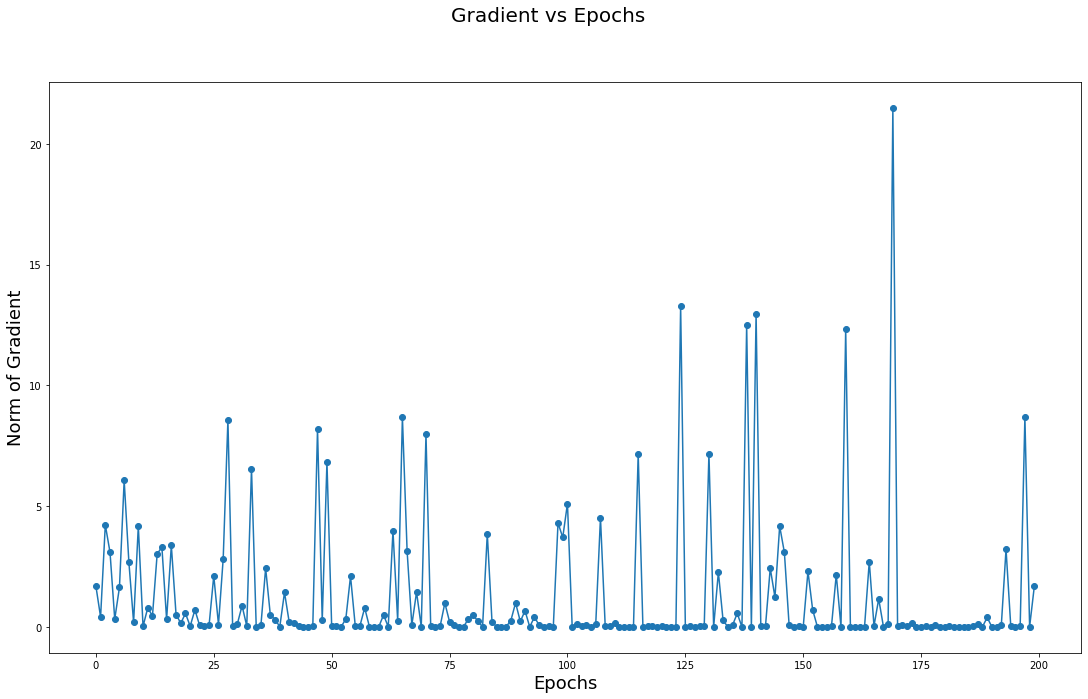

In [59]:
x = np.arange(len(gradien_vector))
fig = plt.gcf()
fig.set_size_inches(18.5, 10.5)
fig.suptitle('Gradient vs Epochs', fontsize=20)
plt.xlabel('Epochs', fontsize=18)
plt.ylabel('Norm of Gradient', fontsize=18)
plt.scatter(x,gradien_vector)
plt.plot(x,gradien_vector)
plt.savefig('Line_plot.pdf')

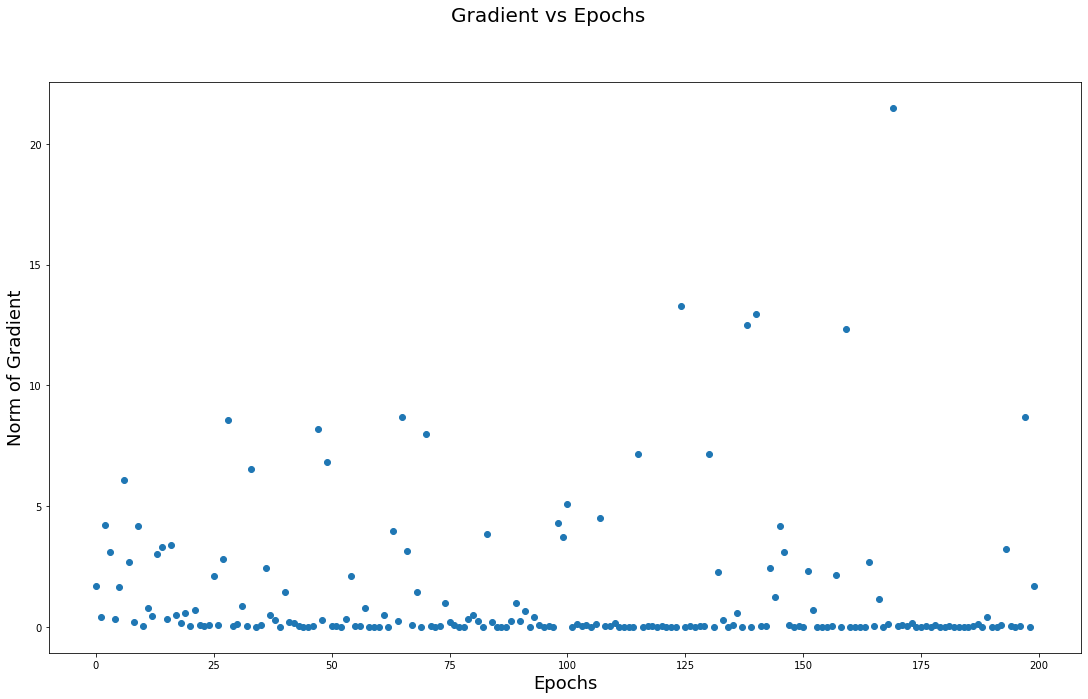

In [58]:
x = np.arange(len(gradien_vector))
fig = plt.gcf()
fig.set_size_inches(18.5, 10.5)
fig.suptitle('Gradient vs Epochs', fontsize=20)
plt.xlabel('Epochs', fontsize=18)
plt.ylabel('Norm of Gradient', fontsize=18)
plt.scatter(x,gradien_vector)
plt.savefig('scatterplot.pdf')